# Demo new sg locations for IEEE technote

Repeating the IFAC tests with new operators for a technical note to submit to IEEE Automation Science and Engineering.

Demonstrated positions are created by `manual_with_triggering.py`, and stored in a `.csv` file. Subgoal labels should be obvious after a 3D plot. Might average a few cycles but (of course) the sourcing of subgoal locations is still a major challenge.

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import exc_analysis.kinematics as kin
import exc_analysis.plotting as excplt

In [2]:
mpl.style.use('mitch-exp')

In [3]:
ls

analysis-dev.ipynb   pts_0413_1631.csv    sgs_1253_040417.csv
data/                sg-locations.ipynb


Import data with pandas

In [4]:
data = pd.read_csv('pts_0413_1631.csv')
data.head()

,Time,Boom Cmd,Stick Cmd,Bucket Cmd,Swing Cmd,Boom Ms,Stick Ms,Bucket Ms,Swing Ms
0,54.724667,7.4745,6.9645,7.614,7.4695,7.523129,4.139655,2.658375,1.489311
1,60.778828,7.4745,6.9645,7.614,7.4695,7.461258,6.104848,10.143214,1.489311
2,66.269725,7.4745,6.9645,7.614,7.4695,9.698571,6.104848,10.413667,1.489311
3,73.593972,7.4745,6.9645,7.614,7.4695,9.740714,7.085200,10.413667,0.154134
4,78.882317,7.4745,6.9645,7.614,7.4695,9.698571,7.085200,3.800385,0.154134


In [5]:
states = data.as_matrix(columns=['Boom Ms', 'Stick Ms', 'Bucket Ms', 'Swing Ms'])
states_xyz = kin.forward_kin_array(states)
states_xyz

array([[  6.09337097,  74.61341694,  12.08202432],
       [  4.11396316,  50.37553922,  14.33026779],
       [  3.91993064,  47.99960822,  31.78514934],
       [ 45.26144661,   7.03212218,  31.10487495],
       [ 62.38225192,   9.69212543,  22.46988274],
       [  2.53740957,  73.81619685,  14.22721356],
       [  1.69624849,  49.3458423 ,   9.10800493],
       [  1.63835332,  47.66160434,  29.22317102],
       [ 43.82894463,   5.84316375,  31.18518482],
       [ 60.90642746,   8.11989045,  21.37320492],
       [  3.55558085,  75.39590988,  12.79050958],
       [  2.04931502,  43.45562003,  13.41458074],
       [  1.95358047,  41.42557374,  30.18584141],
       [ 41.3398363 ,   3.98967625,  30.01900592],
       [ 57.63206348,   5.56202675,  23.95738625],
       [  2.07132047,  72.73308995,   9.90137402],
       [  1.18698884,  41.68035189,  12.26221705],
       [  1.13485592,  39.84973778,  29.94967561],
       [ 39.50711317,   3.49985413,  30.19546741],
       [ 56.57987702,   5.01229

In [8]:
states_xyz.shape

(20, 3)

<IPython.core.display.Javascript object>


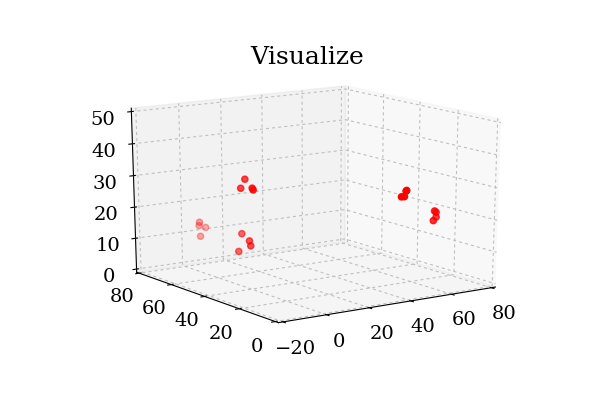

In [6]:
excplt.plot_3d_scatter(states_xyz, 'Visualize')

In [16]:
labels = np.array([1, 2, 3, 4, 5]*4)
labels.size

20

<IPython.core.display.Javascript object>


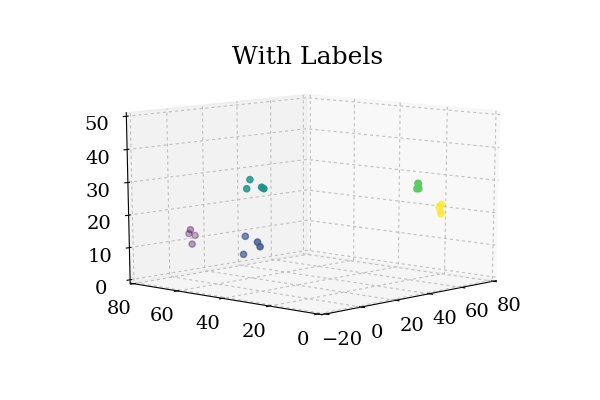

In [17]:
excplt.plot_3d_scatter(states_xyz, 'With Labels', color=labels)

In [18]:
# Discard the outlier
# states_xyz_new = np.delete(states_xyz, [1], axis=0)
# labels_new = np.delete(labels, [1], axis=0)
# states_new = np.delete(states, [1], axis=0)
# states_xyz_new, labels_new, states

In [20]:
# excplt.plot_3d_scatter(states_xyz_new, 'No outlier', color=labels_new)

In [21]:
np.mean(states[labels==1], axis=0)

array([ 7.58350403,  3.96200511,  3.36723246,  1.52293613])

In [30]:
# Compute the means for each subgoal
for i in np.unique(labels):
    mean = np.mean(states[labels==i], axis=0)
    print('SG %i: [%s, %s, %s, %s]' % (i, mean[0], mean[1], mean[2], mean[3]))

SG 1: [7.58350403226, 3.96200510856, 3.36723245703, 1.52293612621]
SG 2: [7.38391935484, 7.59597462121, 9.85991071428, 1.52293612621]
SG 3: [9.85271825397, 7.60537462121, 10.2360376984, 1.52293612621]
SG 4: [9.97700396824, 8.13428125, 10.2288055556, 0.11780972451]
SG 5: [9.9453968254, 8.13428125, 3.42044721767, 0.11780972451]


Moving over to `tests/sg_models/sgs_0413.py`
___